In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import base64
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [13]:
top100_song_list1 = pd.read_csv('top100_song_list1.csv')

In [14]:
top100_song_list = pd.read_csv('top100_song_list.csv')

In [49]:
title = []
hit = []
like = []
rank = []
for i in range(len(top100_song_list)):
    for k in range(len(top100_song_list1)):
        x = top100_song_list
        y = top100_song_list1
        if x['Title'][i] == y['Title'][k]:
            a = y['Like'][k] - x['Like'][i]
            b = y['Hit'][k] - x['Hit'][i]
            c = y['Rank'][k] - x['Rank'][i]
            title.append(x['Title'][i])
            hit.append(a)
            like.append(b)
            rank.append(c)

In [50]:
comp = pd.DataFrame({
    'Title': title,
    'Hit': hit,
    'Like': like,
    'Rank': rank
})
comp

,Title,Hit,Like,Rank
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976,1
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2
2,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,117,8178,-1
3,임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥,226,4575,1
4,당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip,1025,6208,3
5,SK 야수FA 보강 절실 / LG 윌슨 교체 가능성 / 롯데 성민규-허문회 내년에도 함께,51,11503,79
6,HL 대한민국 vs 카타르,64,23263,48
7,[매부리TV] 내년 집값이 위험한 이유/ 이광수 미래에셋증권 연구원,51,20399,78
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398,-6
9,"[전체HL] '나성범 4안타+알테어 홈런' NC, 두산 잡고 기선제압",44,11122,37


In [39]:
comp.sort_values(by='Like', ascending=False)

,Title,Hit,Like
13,"[8회 예고] 유진, 헤라팰리스 입성할 수 있을까?!",88,47508
12,소원 불만가득♨ 20만원 꽃다발에 급 과거 회상..😩,47,28498
10,“제일 중요한 건 너야” 습관 바꾸라는 엄마,66,23355
6,HL 대한민국 vs 카타르,64,23263
7,[매부리TV] 내년 집값이 위험한 이유/ 이광수 미래에셋증권 연구원,51,20399
16,소원의 빅피처? “누가 혜정이 옷 사주니까~”,23,18995
15,"“내 자식이기도 해요” 이지아, 쌍둥이 압박하는 엄기준에 든 반기!",63,17570
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976
5,SK 야수FA 보강 절실 / LG 윌슨 교체 가능성 / 롯데 성민규-허문회 내년에도 함께,51,11503


In [52]:
comp.sort_values(by='Rank')

,Title,Hit,Like,Rank
20,두산-NC 풀영상,16,7177,-25
25,김희재✕이수영 ‘슬픈 사랑의 노래’ ♫ 감미로운 듀엣..,61,3065,-14
19,마음 도난 주의보 발령~ 하늘에서 영탁이 내려와♬♡,121,3934,-8
17,‘I Believe’ ♫ 희재가 100점 받을 거라 믿어요😘,57,3961,-8
11,기대하세요~ 소름 돋는 14살의 절절함 ‘사모’♪,121,6030,-7
21,나왔다! 찬원이의 필살기↗ ‘미운 사내’ ♬,21,1601,-6
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398,-6
18,텐션 올려서 갑시다! 93년으로~ ‘처음 그 느낌처럼’♪,114,2798,-5
14,[풀버전] 사랑의 콜센타 이찬원 '떠나는 임아' ♫,65,2029,-5
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117,-2


In [40]:
comp.sort_values(by='Hit', ascending=False)

,Title,Hit,Like
4,당신이 김호중을 처음 만난다면? 사람들 리얼반응 모음.zip,1025,6208
1,레전드 무대 예약😍 임영웅 ‘그날들’ ♫,373,15117
3,임영웅 ‘오랜만이야’ ♪ 가슴 찡-한 무대😥,226,4575
26,‘고백’ ♬ 크러쉬 ✕ MC웅의 숨겨왔던 랩 실력🎤,155,10730
0,잠시만 안녕. 김호중 군복무전 마지막 무대 ＜배웅＞ㅣ김호중의파트너 EP.5,138,12976
8,‘넌 나의 20대였어’ ♬ 영탁의 뜨거웠던 20대 시절..,137,5398
24,‘Beautiful’♪ 전주부터 차오르는 감성 영웅♥,131,6480
19,마음 도난 주의보 발령~ 하늘에서 영탁이 내려와♬♡,121,3934
11,기대하세요~ 소름 돋는 14살의 절절함 ‘사모’♪,121,6030
2,소름이 쫘-악↗ 이찬원✕옥진욱 ‘남자라는 이유로’ ♪,117,8178


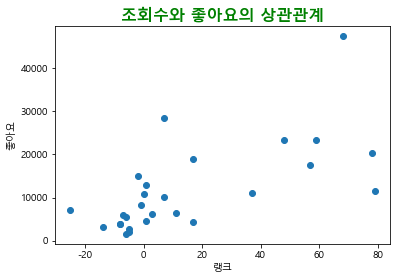

In [54]:
plt.scatter(comp['Rank'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

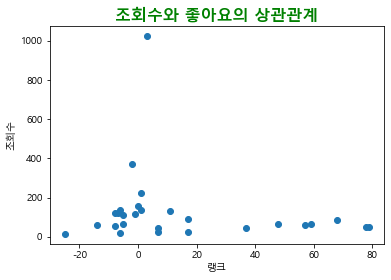

In [56]:
plt.scatter(comp['Rank'], comp['Hit'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('랭크')
plt.ylabel('조회수')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()

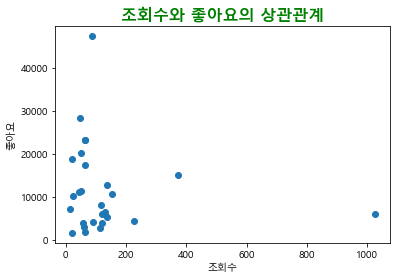

In [58]:
plt.scatter(comp['Hit'], comp['Like'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('조회수')
plt.ylabel('좋아요')
plt.title('조회수와 좋아요의 상관관계', fontdict=title_font)
plt.show()